In [1]:
import pandas as pd

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# to save the audio files
import soundfile as sf

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Paths for data.
Ravdess = "datasets/Ravdess/audio_speech_actors_01-24/"
Crema = "datasets/Crema/"
Tess = "datasets/Tess/"
Savee = "datasets/Savee/"

# Distribution of Audio Lengths

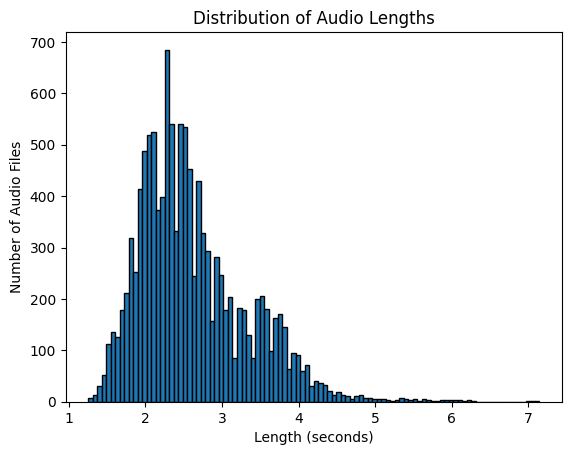

In [34]:
ravdess_directory_list = os.listdir(Ravdess)
crema_directory_list = os.listdir(Crema)
tess_directory_list = os.listdir(Tess)
savee_directory_list = os.listdir(Savee)

# Initialize a list to store the lengths of the audio files
audio_lengths = []

# Loop through each file and get the length
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        y, sr = librosa.load(Ravdess + dir + '/' + file)
        length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(length)

# Loop through each file and get the length
for file in crema_directory_list:
    y, sr = librosa.load(Crema + file)
    length = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(length)

# Loop through each file and get the length
for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        y, sr = librosa.load(Tess + dir + '/' + file)
        length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(length)

# Loop through each file and get the length
for file in savee_directory_list:
    y, sr = librosa.load(Savee + file)
    length = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(length)

# Plot the histogram
plt.hist(audio_lengths, bins=100, edgecolor='black')
plt.title('Distribution of Audio Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Number of Audio Files')
plt.show()

# Finding Optimal Volume Values for Trimming

In [48]:
import librosa
import numpy as np
import scipy

def noise_reduction(audio, sr, noise_profile=None):
    # Compute the STFT of the signal
    stft = librosa.stft(audio)
    magnitude, phase = librosa.magphase(stft)
    
    # Estimate the noise profile if not provided
    if noise_profile is None:
        noise_profile = np.median(magnitude, axis=1, keepdims=True)
    
    # Subtract the noise profile from the magnitude
    magnitude_cleaned = np.maximum(magnitude - noise_profile, 0)
    
    # Reconstruct the audio signal from the cleaned magnitude and original phase
    stft_cleaned = magnitude_cleaned * phase
    audio_cleaned = librosa.istft(stft_cleaned)
    
    return audio_cleaned

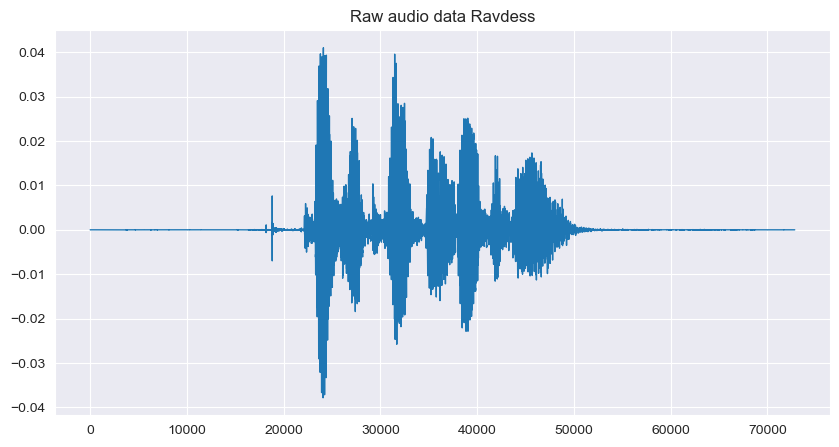

In [3]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess')
Audio(y, rate=sr)


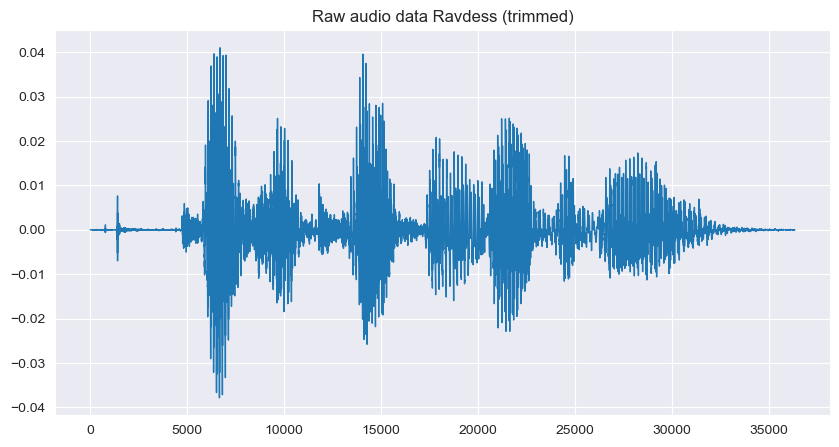

In [68]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)
y_trimmed, _ = librosa.effects.trim(y, top_db=50)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess (trimmed)')
Audio(y_trimmed, rate=sr)

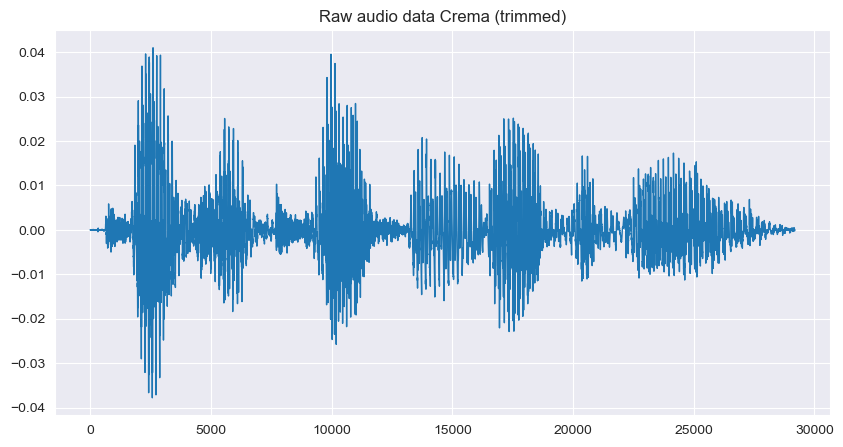

In [71]:
ravdess_actor_1 = os.listdir(Ravdess)[0]
audio, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)

audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)

audio, _ = librosa.effects.trim(audio, top_db=30)

pd.Series(audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Crema (trimmed)')
Audio(audio, rate=sr)

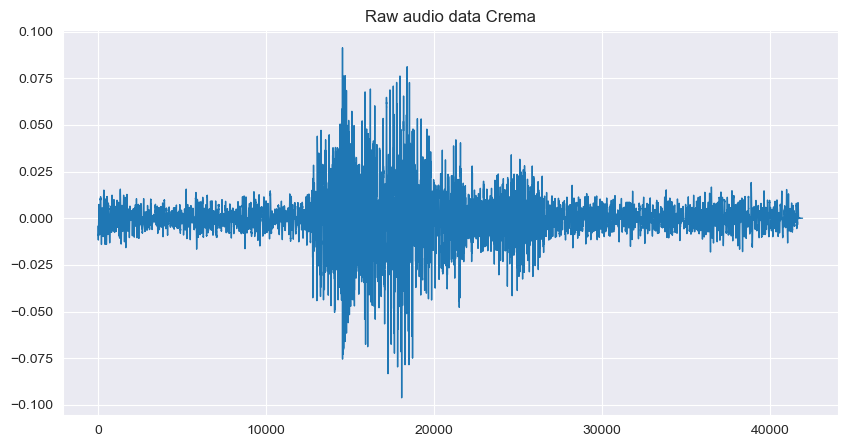

In [36]:
crema_file_1 = os.listdir(Crema)[20]

y, sr = librosa.load(Crema + crema_file_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Crema')
Audio(y, rate=sr)


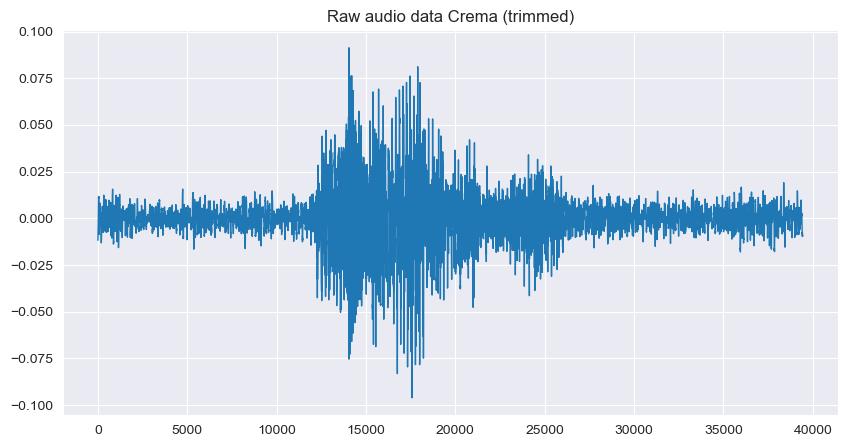

In [72]:
crema_file_1 = os.listdir(Crema)[20]

y, sr = librosa.load(Crema + crema_file_1)
y_trimmed, _ = librosa.effects.trim(y, top_db=15)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Crema (trimmed)')
Audio(y_trimmed, rate=sr)


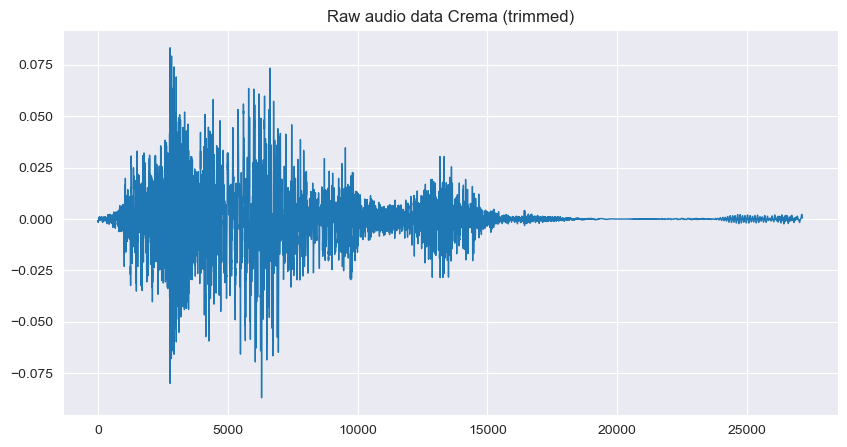

In [75]:
crema_file_1 = os.listdir(Crema)[20]
audio, sr = librosa.load(Crema + crema_file_1)

audio = noise_reduction(audio, sr)
audio = noise_reduction(audio, sr)
audio = noise_reduction(audio, sr)
audio = noise_reduction(audio, sr)
audio = noise_reduction(audio, sr)

y_trimmed, _ = librosa.effects.trim(audio, top_db=30)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Crema (trimmed)')
Audio(y_trimmed, rate=sr)

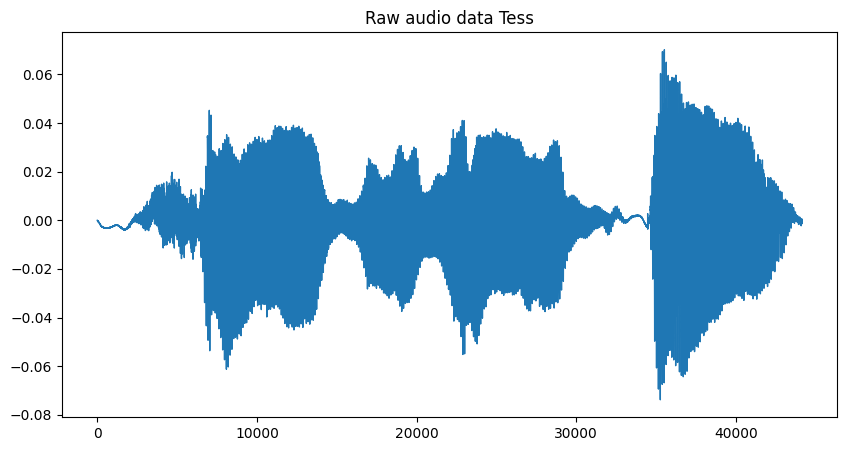

In [83]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess')
Audio(y, rate=sr)


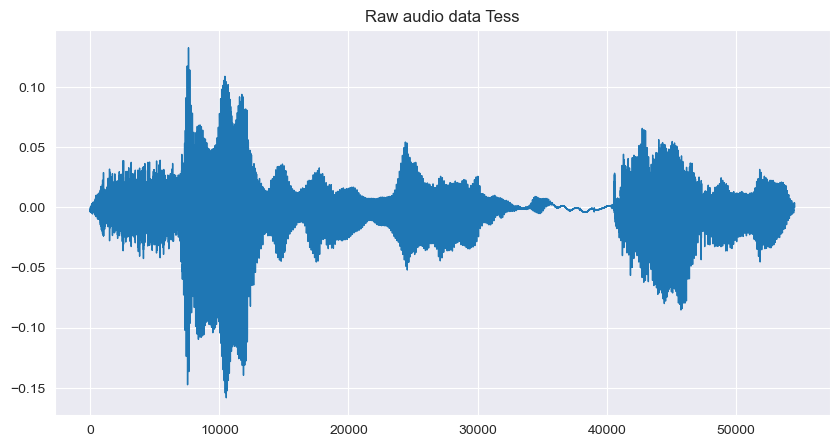

In [61]:
tess_directory_1 = os.listdir(Tess)[1]
audio_1 = os.listdir(Tess + tess_directory_1)[30]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)
y_trimmed, _ = librosa.effects.trim(y)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess')
Audio(y_trimmed, rate=sr)


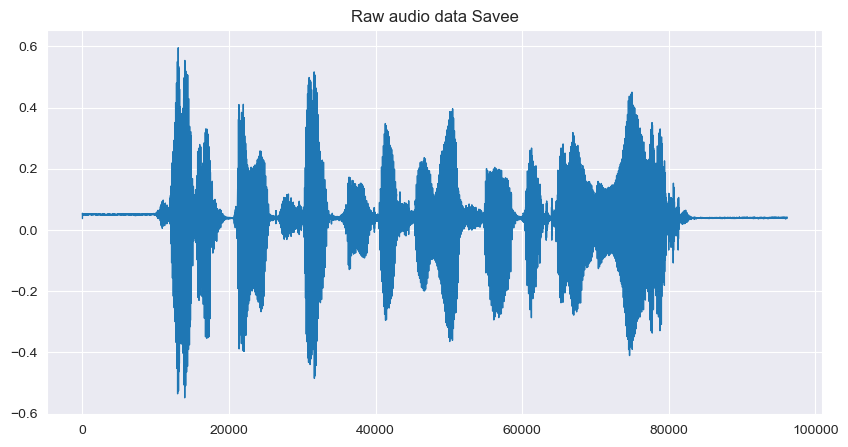

In [65]:
savee_audio_1 = os.listdir(Savee)[15]

y, sr = librosa.load(Savee + '/' + savee_audio_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Savee')
Audio(y, rate=sr)

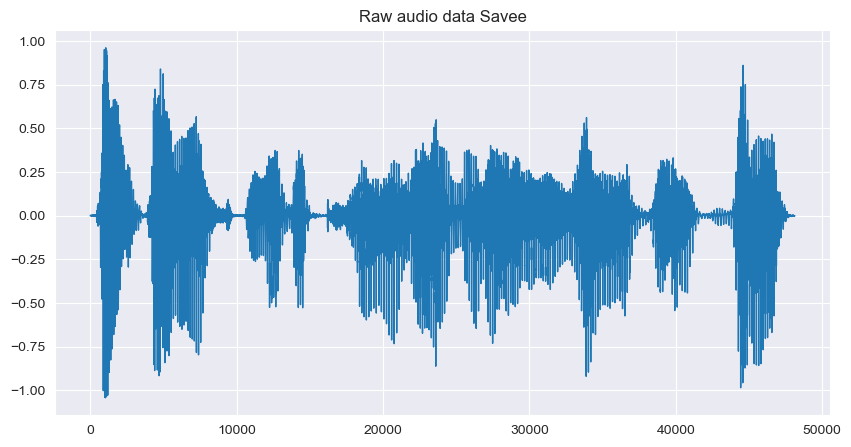

In [81]:
savee_audio_1 = os.listdir(Savee)[1]

audio, sr = librosa.load(Savee + '/' + savee_audio_1)

audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)
# audio = noise_reduction(audio, sr)

audio, _ = librosa.effects.trim(audio, top_db=25)

pd.Series(audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Savee')
Audio(audio, rate=sr)

# Distribution of Audio Lengths (trimmed)

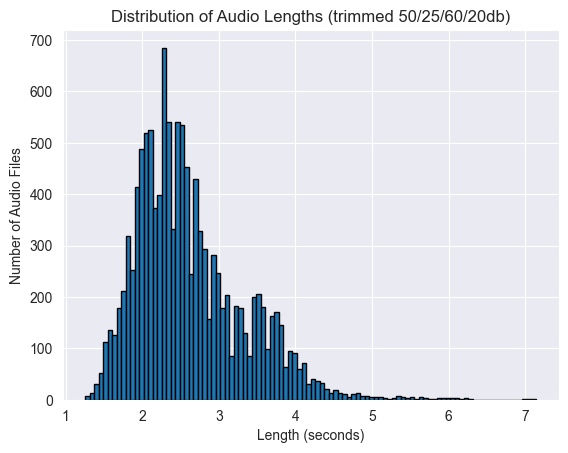

In [3]:
ravdess_directory_list = os.listdir(Ravdess)
crema_directory_list = os.listdir(Crema)
tess_directory_list = os.listdir(Tess)
savee_directory_list = os.listdir(Savee)

# Initialize a list to store the lengths of the audio files
audio_lengths = []
long_audios = []
short_audios = []

# Loop through each file and get the length
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        y, sr = librosa.load(Ravdess + dir + '/' + file)
        # y_trimmed, _ = librosa.effects.trim(y, top_db=50)
        # length = librosa.get_duration(y=y_trimmed, sr=sr)
        length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(length)
        if (length > 7):
            long_audios.append(Ravdess + dir + '/' + file)
        if (length <= 1):
            short_audios.append(Ravdess + dir + '/' + file)

# Loop through each file and get the length
for file in crema_directory_list:
    y, sr = librosa.load(Crema + file)
    # y_trimmed, _ = librosa.effects.trim(y, top_db=25)
    # length = librosa.get_duration(y=y_trimmed, sr=sr)
    length = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(length)
    if (length > 7):
        long_audios.append(Crema + file)
    if (length <= 1):
        short_audios.append(Crema + file)

# Loop through each file and get the length
for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        y, sr = librosa.load(Tess + dir + '/' + file)
        # y_trimmed, _ = librosa.effects.trim(y)
        # length = librosa.get_duration(y=y_trimmed, sr=sr)
        length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(length)
        if (length > 7):
            long_audios.append(Tess + dir + '/' + file)
        if (length <= 1):
            short_audios.append(Tess + dir + '/' + file)

# Loop through each file and get the length
for file in savee_directory_list:
    y, sr = librosa.load(Savee + file)
    # y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    # length = librosa.get_duration(y=y_trimmed, sr=sr)
    length = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(length)
    if (length > 7):
        long_audios.append(Savee + file)
    if (length <= 1):
        short_audios.append(Savee + file)

# Plot the histogram
plt.hist(audio_lengths, bins=100, edgecolor='black')
plt.title('Distribution of Audio Lengths (trimmed 50/25/60/20db)')
plt.xlabel('Length (seconds)')
plt.ylabel('Number of Audio Files')
plt.show()

# Shortest audio samples

In [20]:
for i in range(50):
    print(audio_lengths[i])

1.2541043083900227
1.2679818594104308
1.2880725623582767
1.2969160997732427
1.2978684807256236
1.308344671201814
1.3119274376417234
1.3124263038548754
1.3189115646258502
1.3265759637188208
1.3337414965986394
1.3346938775510204
1.3346938775510204
1.3346938775510204
1.3351020408163266
1.3566439909297052
1.3597278911564625
1.3667573696145126
1.3680272108843536
1.3680272108843536
1.3680725623582766
1.3717460317460317
1.3749206349206349
1.3765532879818594
1.3779591836734695
1.3824943310657596
1.386938775510204
1.386938775510204
1.390204081632653
1.3912925170068027
1.393106575963719
1.3950566893424037
1.3951927437641722
1.3952380952380952
1.3964172335600906
1.398140589569161
1.39859410430839
1.40140589569161
1.40140589569161
1.403265306122449
1.4054875283446713
1.4136054421768707
1.4146938775510205
1.4214965986394559
1.4231292517006802
1.423764172335601
1.4245351473922903
1.4251700680272108
1.4254421768707484
1.4273469387755102


In [4]:
short_audios

[]

In [27]:
y, sr = librosa.load(short_audios[0])
y_trimmed, _ = librosa.effects.trim(y, top_db=25)
librosa.get_duration(y=y_trimmed, sr=sr)

# pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1,  title = 'Raw audio Crema (longest sample)')
# Audio(y_trimmed, rate=sr)

0.6501587301587302

In [28]:
y, sr = librosa.load(short_audios[1])
y_trimmed, _ = librosa.effects.trim(y, top_db=25)
length = librosa.get_duration(y=y_trimmed, sr=sr)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio Crema (longest sample)')
Audio(y_trimmed, rate=sr)
length

0.626938775510204

# Longest audio sample

In [112]:
long_audios

['datasets/Savee/JE_sa14.wav']

7.138730158730159

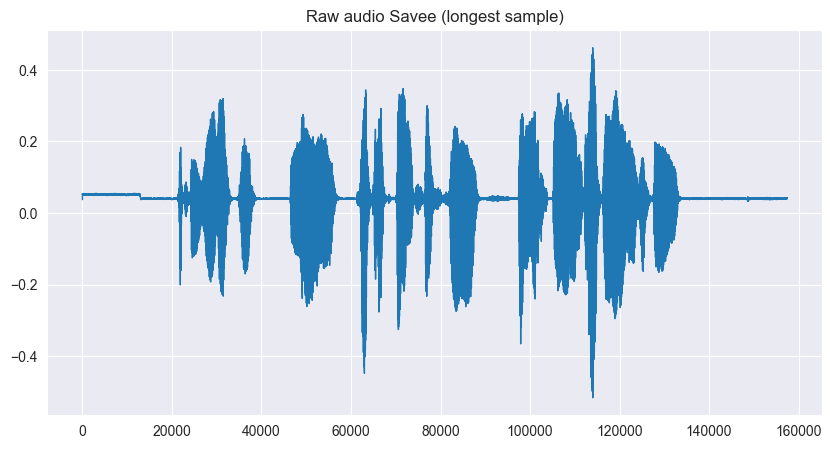

In [29]:
y, sr = librosa.load(long_audios[0])
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
length = librosa.get_duration(y=y_trimmed, sr=sr)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio Savee (longest sample)')
Audio(y_trimmed, rate=sr)
length

# Experimenting with normalization

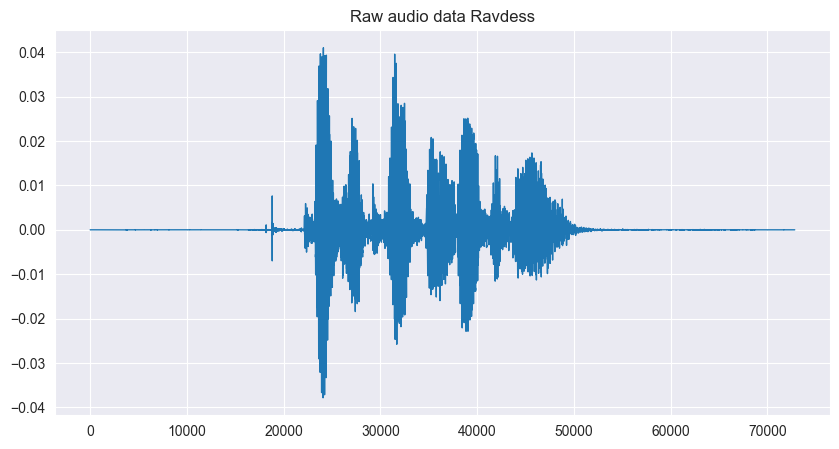

In [6]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess')
Audio(y, rate=sr)

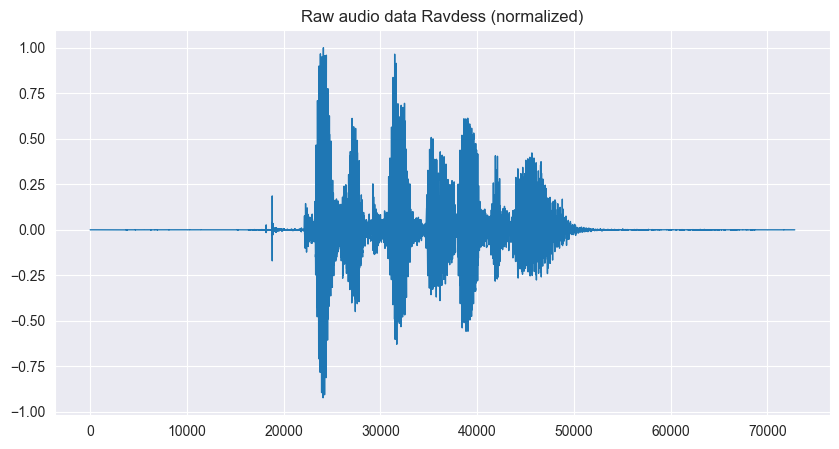

In [7]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)
normalized_audio = librosa.util.normalize(y)

pd.Series(normalized_audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess (normalized)')
Audio(normalized_audio, rate=sr)

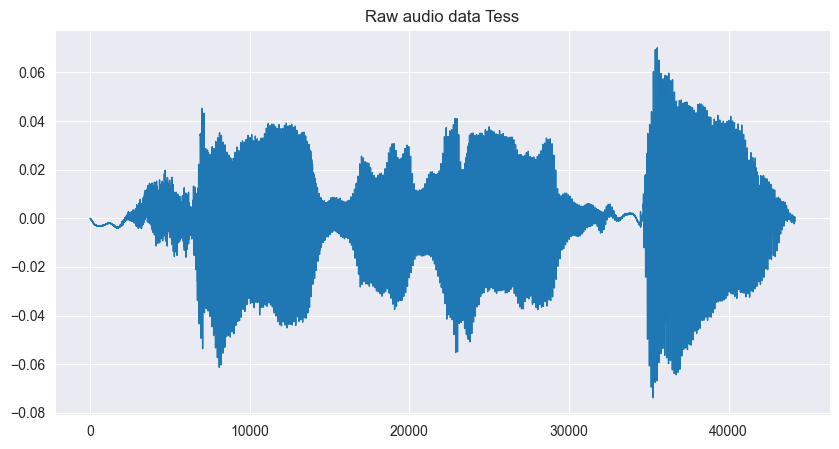

In [8]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess')
Audio(y, rate=sr)


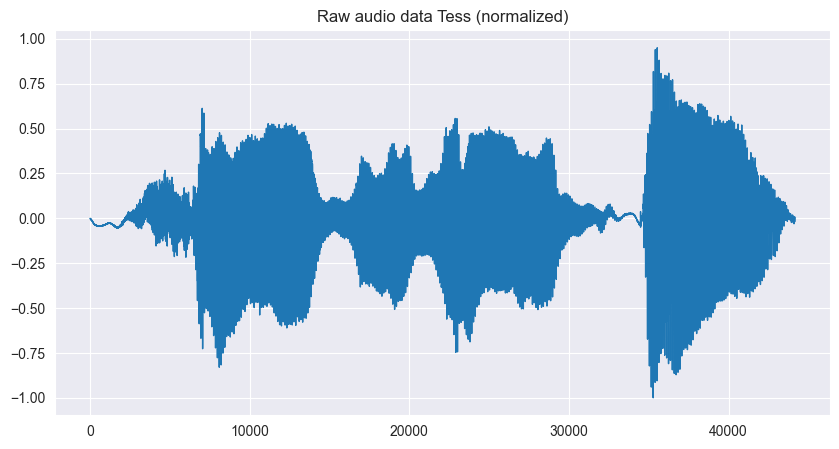

In [9]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)
normalized_audio = librosa.util.normalize(y)

pd.Series(normalized_audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess (normalized)')
Audio(normalized_audio, rate=sr)


In [41]:
import librosa
import numpy as np

segment_length = 1
segments = []
lengths = []

# Example usage:
file_path = 'datasets/Savee/JE_sa14.wav'  # Replace with your audio file path
audio, sr = librosa.load(file_path, sr=None)  
# audio, sr = librosa.load(file_path, offset=1, duration=1.5) # Load audio with its original sample rate
print(librosa.get_duration(y=audio, sr=sr))
y_trimmed, _ = librosa.effects.trim(audio, top_db=15)
print(librosa.get_duration(y=y_trimmed, sr=sr))
normalized_audio = librosa.util.normalize(y_trimmed)

segment_length_samples = int(segment_length * sr)
num_segments = -(-len(normalized_audio) // segment_length_samples)

for i in range(num_segments):
    start_sample = i * segment_length_samples
    end_sample = start_sample + segment_length_samples
    segment = normalized_audio[start_sample:end_sample]
    
    seg_ln = librosa.get_duration(y=segment, sr=sr)
    if seg_ln > 0.2:
        if segment_length > seg_ln:
            segment = librosa.util.fix_length(segment, size=22050)
        print("end ", librosa.get_duration(y=segment, sr=sr))
        seg_ln = librosa.get_duration(y=segment, sr=sr)
        lengths.append(seg_ln)
        segments.append(segment)

7.138730158730159
6.03718820861678
7
in
44100
end  1.0
in
44100
end  1.0
in
44100
end  1.0
in
44100
end  1.0
in
44100
end  1.0
in
44100
end  1.0


In [42]:
lengths

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

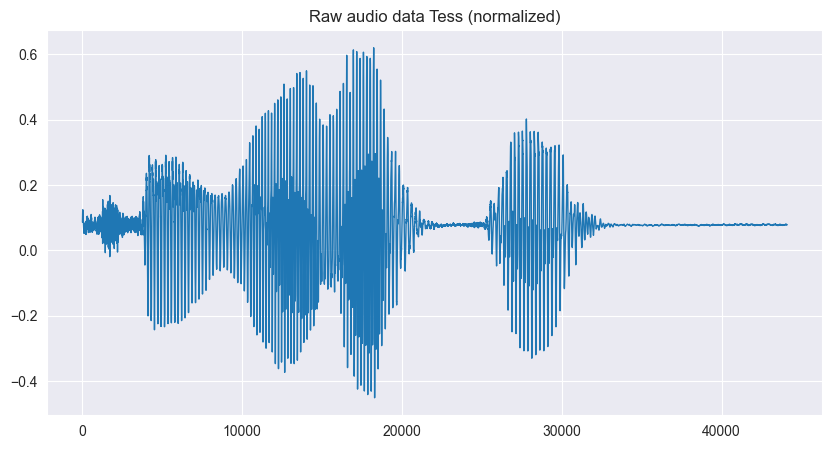

In [46]:
import pandas as pd
from IPython.display import Audio

output_file_path = os.path.join(f'test.wav')
sf.write(output_file_path, segments[5], sr)

audio, sr = librosa.load("test.wav", sr=None)  # Load audio with its original sample rate


pd.Series(segments[1]).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess (normalized)')
Audio(audio, rate=sr)


In [8]:
-(-5 // 2)

3

In [7]:
5 / 2

2.5

In [15]:
file_path = 'datasets/Savee/JE_sa14.wav'  # Replace with your audio file path
audio, sr = librosa.load(file_path, offset=1, duration=1.5)  # Load audio with its original sample rate

Audio(audio, rate=sr)